In [153]:
%matplotlib inline  

import matplotlib as mpl 
import matplotlib.pyplot as plt 
import matplotlib.font_manager as fm  

!apt-get update -qq
!apt-get install fonts-nanum* -qq

path = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf' 
font_name = fm.FontProperties(fname=path, size=10).get_name()
print(font_name)
plt.rc('font', family=font_name)

fm._rebuild()
mpl.rcParams['axes.unicode_minus'] = False
#런타임 다시 사작

NanumBarunGothic


In [154]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [155]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [156]:
df = pd.read_csv('/content/drive/My Drive/관광/진짜최종.csv')

# 전처리

+ 이상치 처리(연속형 변수에 대해)

In [157]:
def sigma_3(x):
  quartile_1 = df[x].quantile(0.25)
  quartile_3 = df[x].quantile(0.75)
  IQR = quartile_3 - quartile_1
  df_result = df[(df[x] < (quartile_1 - 1.5 * IQR)) | (df[x] > (quartile_3 + 1.5 * IQR))]
  df.drop(df_result.index, axis=0,inplace=True)


In [158]:
x_list = ['D_TRA1_S_Day','D_TRA1_COST','A8_TOTAL','A9A_1','A9A_2','A9B','A9C','A9D','A9E','A9F','A9F_5','A9G','A9I',"PA9I",'NA9I','A9I_1','NA9I_1','A9','A90D','A90F','A90G','A90I']
for i in x_list:
  sigma_3(i)



+ 최종본 복사를 위한 df2


In [159]:
df2=df.copy()

# 최초변수선택

In [160]:
df.columns

Index(['D_TRA1_CASE', 'D_TRA1_S_Day', 'D_TRA1_COST', 'D_TRA1_1_SMONTH',
       'D_TRA1_1_SPOT', 'D_TRA1_1_Code', 'D_TRA1_1_Q6_Ar', 'D_TRA1_1_Q6',
       'A1_1', 'A4_1', 'A5_1', 'A5_2', 'A5_3', 'A5_4', 'A5_5', 'A5_6', 'A5_7',
       'A5_8', 'A5_9', 'A5_10', 'A5_11', 'A5_12', 'A5_13', 'A5_14', 'A5_15',
       'A5_16', 'A5_17', 'A5_18', 'A5_19', 'A5_20', 'A8_TOTAL', 'A9A', 'A9A_1',
       'A9A_2', 'A9B', 'A9C', 'A9D', 'A9E', 'A9F', 'A9F_5', 'A9G', 'A9I',
       'PA9I', 'NA9I', 'A9I_1', 'NA9I_1', 'A9', 'A90D', 'A90F', 'A90G', 'A90I',
       'A10', 'A10A_1', 'A10A_2', 'A10A_3', 'A10A_4', 'A10A_5', 'A10A_6',
       'A10A_7', 'A10A_8', 'A10A_9', 'A10A_10', 'A10A_11', 'A10A_12', 'A11',
       'A12', 'DQ1', 'DQ2', 'DQ3', 'DQ3A_1', 'DQ5', 'DQ6A', 'DQ6B', 'BSEX',
       'BAGE', 'SAGE', 'BJOB', 'BINC1', 'BINC2', 'BEDU', 'BFAM', 'BMON',
       'BARA', 'WT_DOM', '국내_숙박여부', '국내_연간여행경험_국내숙박', '국내_연간여행경험_국내당일',
       '국내_연간여행경험_관광숙박', '국내_연간여행경험_관광당일', '국내_월별여행경험_국내숙박', '국내_월별여행경험_국내당일',
       '국내_월별

In [161]:
#df.drop(columns=['SAGE','D_TRA1_1_SPOT', 'D_TRA1_1_Code', 'D_TRA1_1_Q6_Ar', 'D_TRA1_1_Q6','A10A_4','C_TOTAL','DQ2A','DQ3A_1','DQ3A_2','DQ3A_3','DQ3A_4'],inplace=True)
df.drop(columns=['SAGE','D_TRA1_1_SPOT', 'D_TRA1_1_Code', 'D_TRA1_1_Q6_Ar','D_TRA1_1_Q6'],inplace=True)

+ ['D_TRA1_CASE', 'BARA', 'BJOB','DQ3','A1_1','A4_1'] 
+ 명목형 변수들 Onehot Encoding

In [162]:
OneHot = ['D_TRA1_CASE', 'BARA', 'BJOB','DQ3','A1_1',
          'A4_1']


df3 = pd.get_dummies(df, drop_first=True,columns=OneHot)


In [163]:
변수리스트=df3.columns.tolist()

In [164]:
df3.columns

Index(['D_TRA1_S_Day', 'D_TRA1_COST', 'D_TRA1_1_SMONTH', 'A5_1', 'A5_2',
       'A5_3', 'A5_4', 'A5_5', 'A5_6', 'A5_7',
       ...
       'A4_1_6', 'A4_1_7', 'A4_1_8', 'A4_1_9', 'A4_1_10', 'A4_1_11', 'A4_1_12',
       'A4_1_13', 'A4_1_14', 'A4_1_15'],
      dtype='object', length=133)

+ Normalization

In [165]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df3[변수리스트] = scaler.fit_transform(df3[변수리스트])

In [166]:
feature = df3[변수리스트]

# Clustering

+ 최적 군집값 도출 n=7

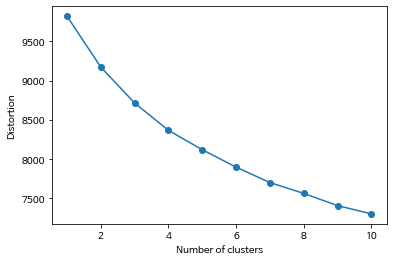

In [167]:
from sklearn.cluster import KMeans
import matplotlib.pyplot  as plt
import seaborn as sns
distortions = []
for i in range(1, 11):
    km = KMeans(
        n_clusters=i, init='random',
        n_init=10, max_iter=300,
        tol=1e-04, random_state=0
    )
    km.fit(df3[변수리스트])
    distortions.append(km.inertia_)
plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

In [168]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=7,algorithm='auto')
model.fit(feature)
predict = pd.DataFrame(model.predict(feature))
predict.columns=['predict']

In [169]:
df2.reset_index(inplace=True,drop=True)
df3.reset_index(inplace=True,drop=True)

In [170]:
df3['cluster'] = predict
df2['cluster'] = predict
change = {0:'A',1:'B',2:'C',3:'D',4:'E',5:'F',6:'G'}
df2 = df2.replace({'cluster':change})
df2.to_csv('/content/drive/My Drive/관광/클러스터최종.csv')

+ 이상치 제거 필요성

# 만족도 변수선택

+ 상관관계
- 다른 항목에 비해 만족도와 상관관계가 너무 높은 a11, a12 제외

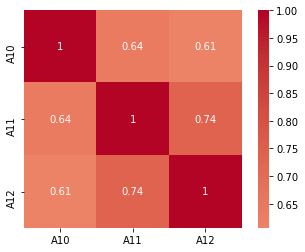

In [171]:
plt.rcParams['font.family'] = 'Malgun Gothic'
correlations = df[['A10','A11','A12']].corr(method='pearson')
sns.heatmap(correlations, cmap="coolwarm", square=True, center=0, annot=True)

In [172]:
from sklearn.datasets import load_boston
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from lightgbm import LGBMRegressor
import pandas as pd
import numpy as np
import seaborn as sns

In [173]:
Y = df3['A10']
X = df3.drop(columns=['A10','A11','A12'])
# shuffle = True
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, 

                                                    Y, 

                                                    test_size=0.4, 

                                                    shuffle=True, 

                                                    random_state=1004)



+ 전체 사용자의 만족도를 결정할때 상위 20개 항목

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44397 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45236 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50672 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44036 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50668 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54665 missing from current font.
  font.set_

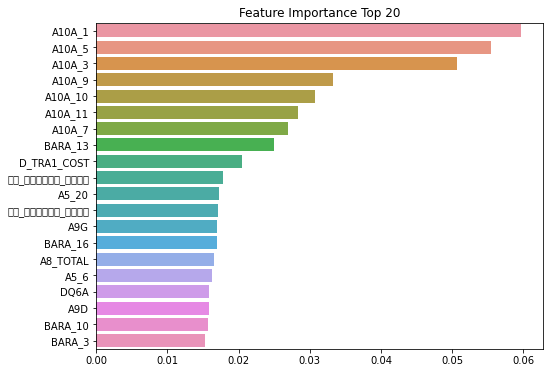

In [174]:
from xgboost import XGBClassifier

model = XGBClassifier(random_state=11)
model.fit(X_train, y_train)

# 배열형태로 반환
ft_importance_values = model.feature_importances_

# 정렬과 시각화를 쉽게 하기 위해 series 전환
ft_series = pd.Series(ft_importance_values, index = X_train.columns)
ft_top20 = ft_series.sort_values(ascending=False)[:20]

# 시각화
plt.figure(figsize=(8,6))
plt.title('Feature Importance Top 20')
sns.barplot(x=ft_top20, y=ft_top20.index)
plt.rc('font', family='NanumBarunGothic')
plt.show()

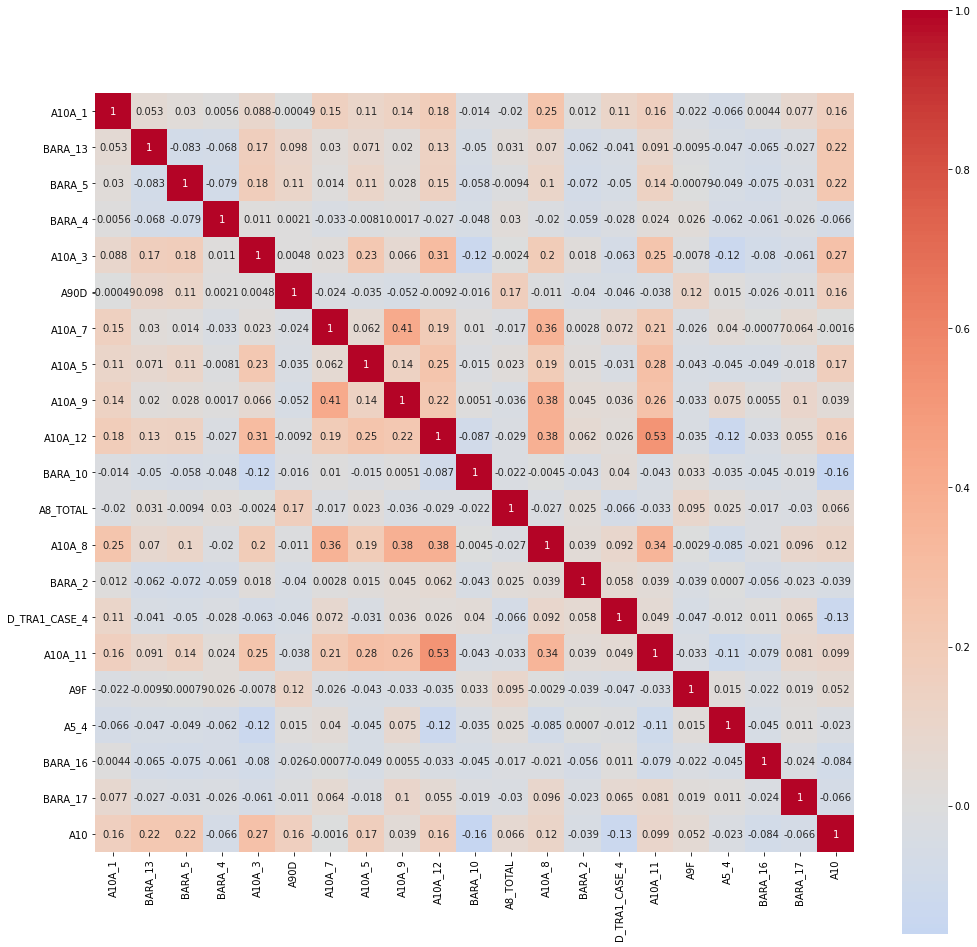

In [135]:
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.figure(figsize=(17, 17))
AA=df_so.index.tolist()
AA.append('A10')
correlations = df3[AA].corr(method='pearson')
sns.heatmap(correlations, cmap="coolwarm", square=True, center=0, annot=True)

In [175]:
for i in range(0,7):
	globals()['df_{}'.format(i)] = df3[df3['cluster'] == i]

In [176]:
df_list = [df_0,df_1,df_2,df_3,df_4,df_5,df_6]

In [177]:
def Top20(df):
  Y = df['A10']
  X = df.drop(columns=['A10','A11','A12'])
  # shuffle = True
  from sklearn.model_selection import train_test_split
  X_train, X_test, y_train, y_test = train_test_split(X, 

                                                      Y, 

                                                      test_size=0.4, 

                                                      shuffle=True, 

                                                      random_state=1004)


  from xgboost import XGBClassifier

  model = XGBClassifier(random_state=11)
  model.fit(X_train, y_train)

  # 배열형태로 반환
  ft_importance_values = model.feature_importances_

  # 정렬과 시각화를 쉽게 하기 위해 series 전환
  ft_series = pd.Series(ft_importance_values, index = X_train.columns)
  ft_top20 = ft_series.sort_values(ascending=False)[:20]

  # 시각화
  plt.figure(figsize=(8,6))
  plt.title('Feature Importance Top 20')
  sns.barplot(x=ft_top20, y=ft_top20.index)
  plt.rc('font', family='NanumBarunGothic')
  plt.show()
  #plt.rc('font', family='NanumBarunGothic')
  plt.rcParams['font.family'] = 'Malgun Gothic'
  plt.figure(figsize=(17, 17))
  df_so = ft_top20.to_frame()
  AA=df_so.index.tolist()
  AA.append('A10')
  correlations = df[AA].corr(method='pearson')
  sns.heatmap(correlations, cmap="coolwarm", square=True, center=0, annot=True)



+ 0~6번 클러스터의 사용자들의 만족도를 결정할때 중요한 변수 탑 20
+ 따라서, 클러스터 사용자들은 다른 특성을 가지고 있고 기술통계량을 통해서 정책 또는 방향 제시 가능
+ 기존의 데이터로 만족도 모델링을 하였으니, 새로운 1인여행을 하려는 사람의 만족도를 예상할 수 있으며
+ 어느 클러스터에 속할지 예측가능함.

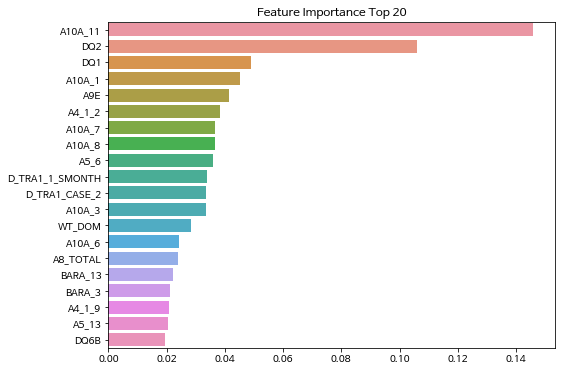

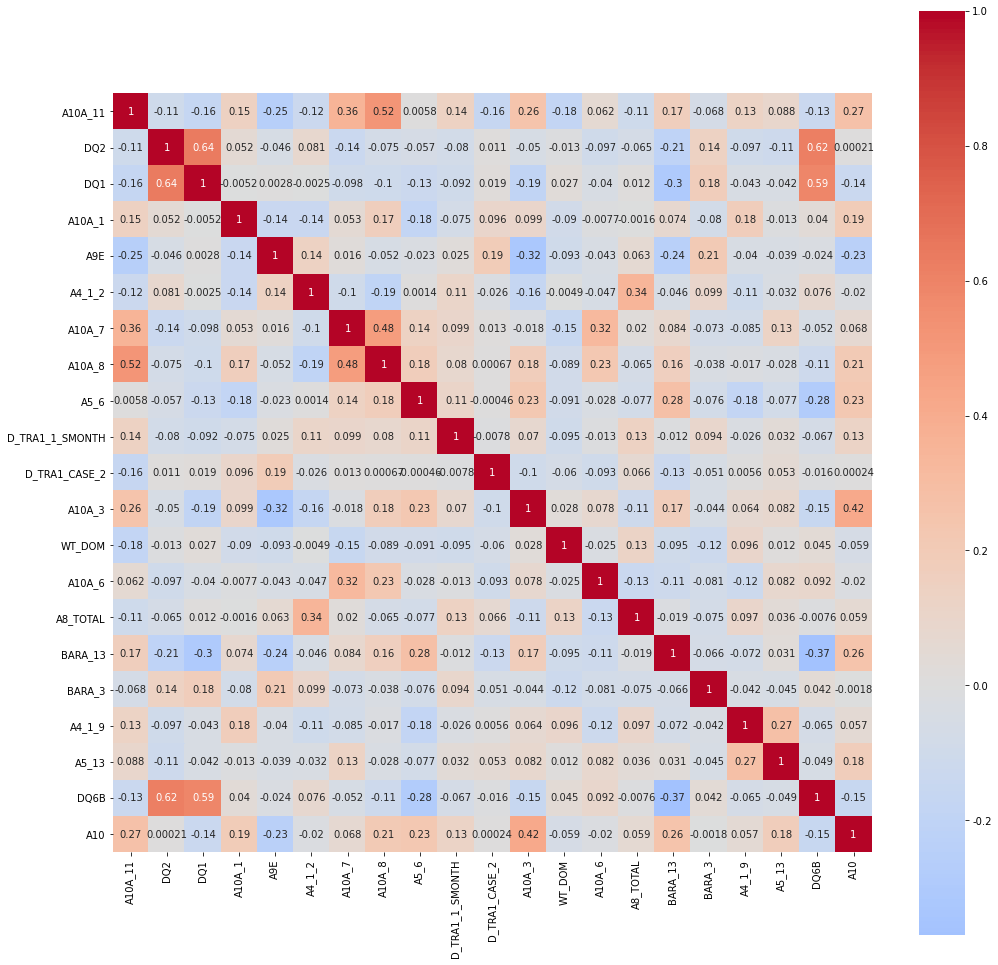

In [178]:
Top20(df_0)

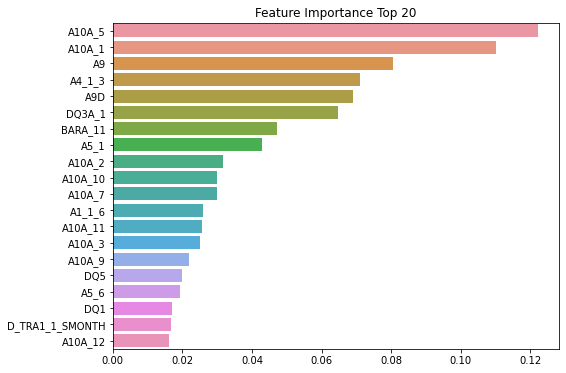

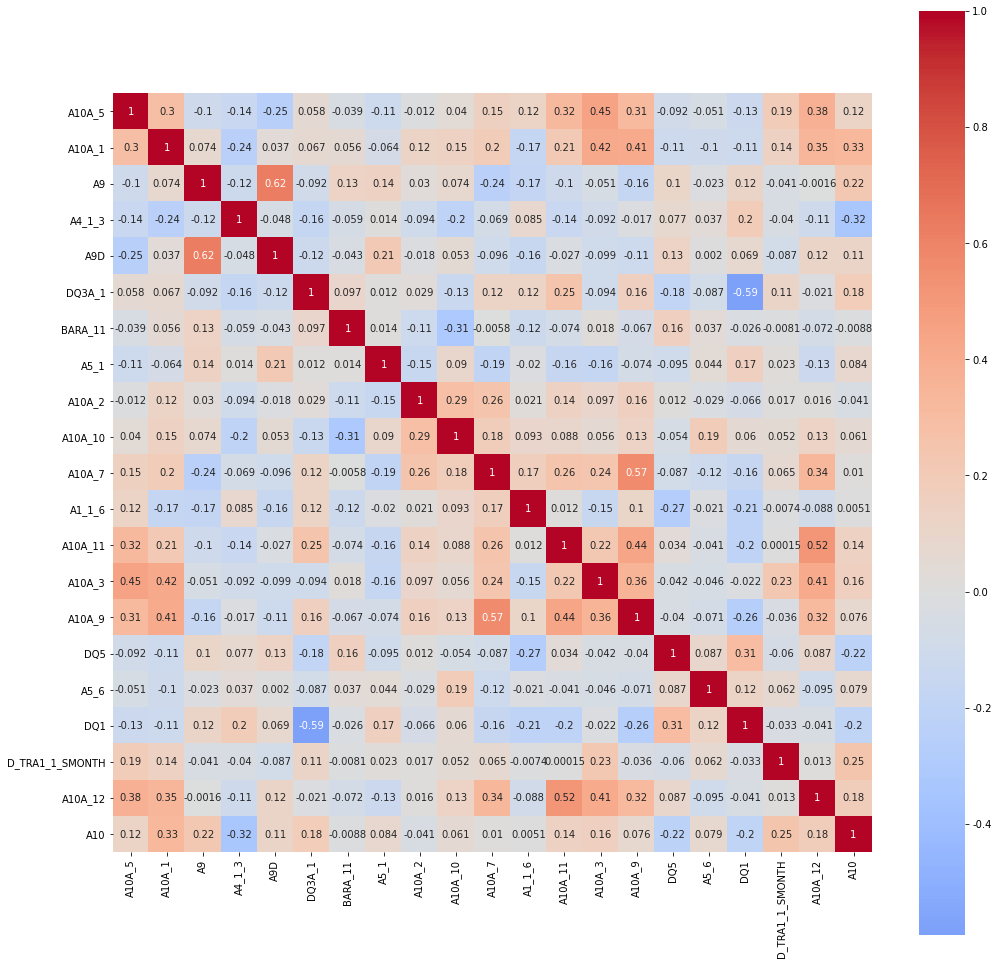

In [179]:
Top20(df_1)

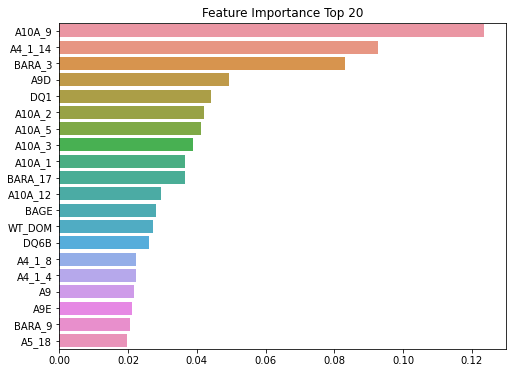

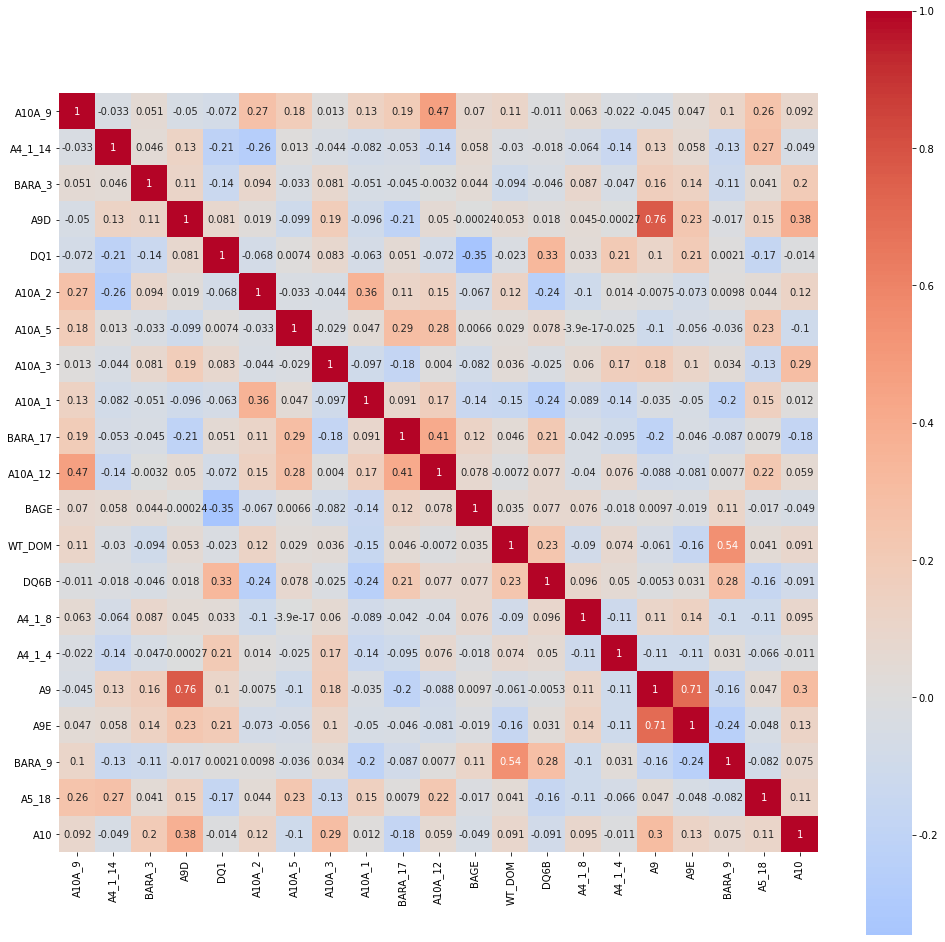

In [180]:
Top20(df_2)

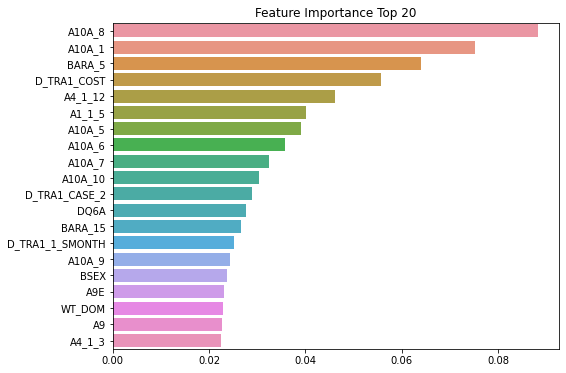

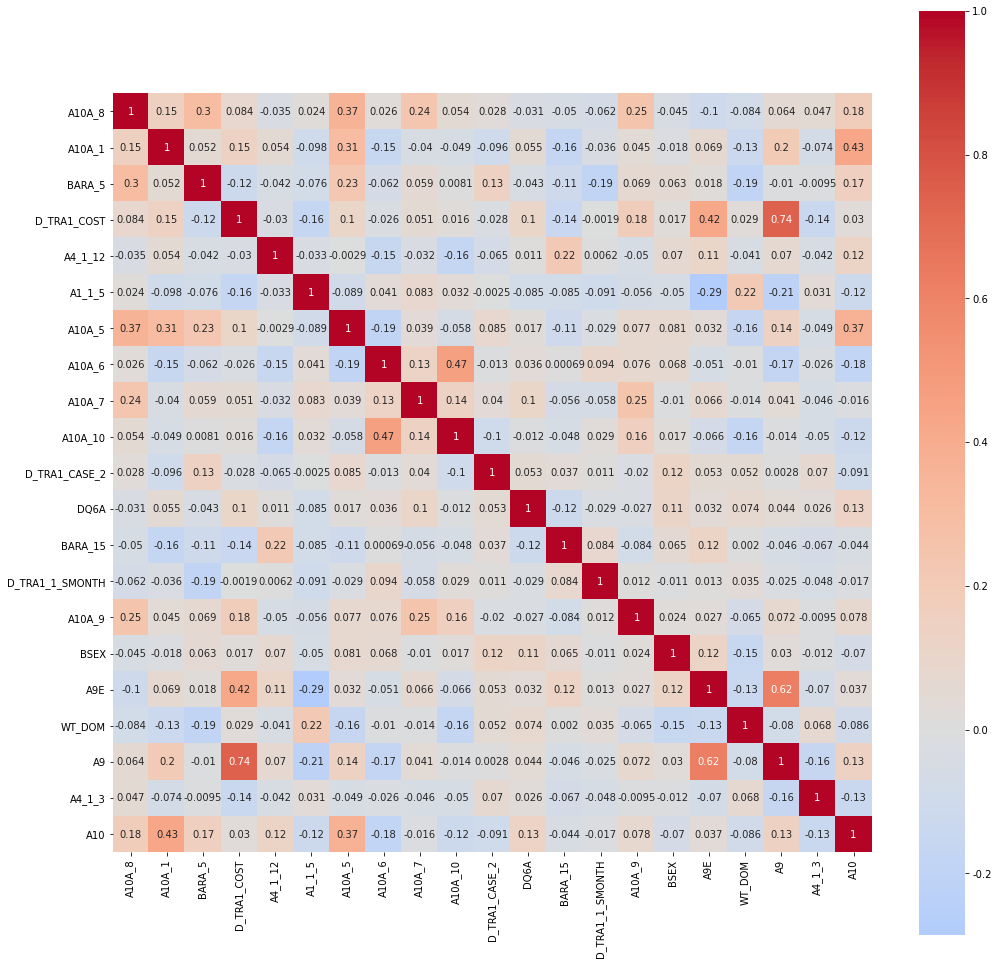

In [181]:
Top20(df_3)

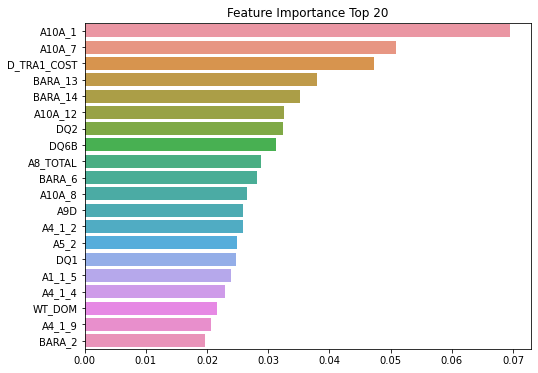

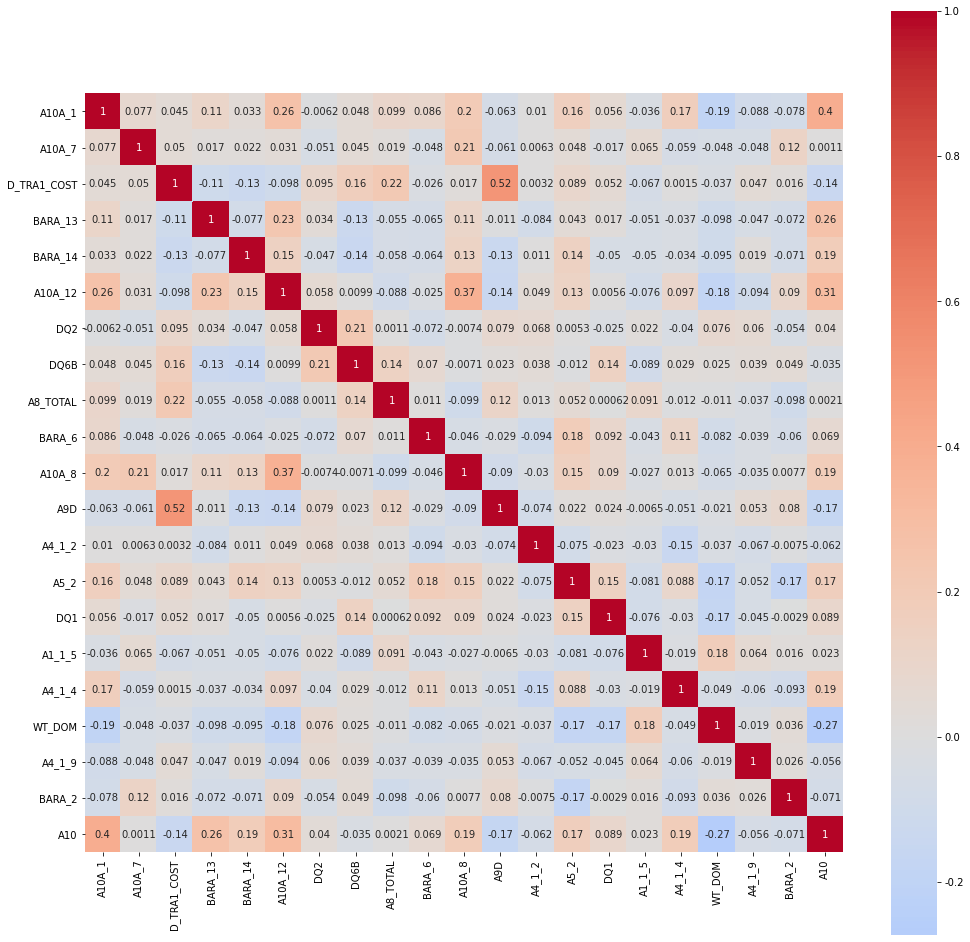

In [182]:
Top20(df_4)

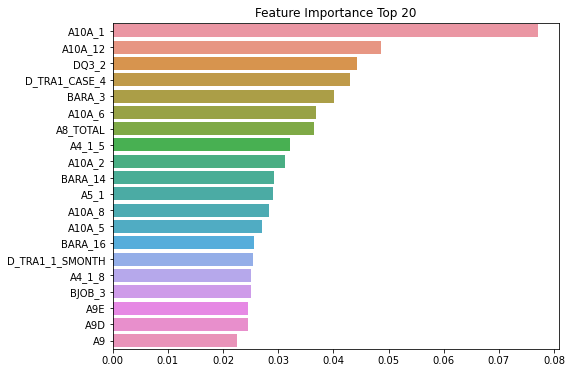

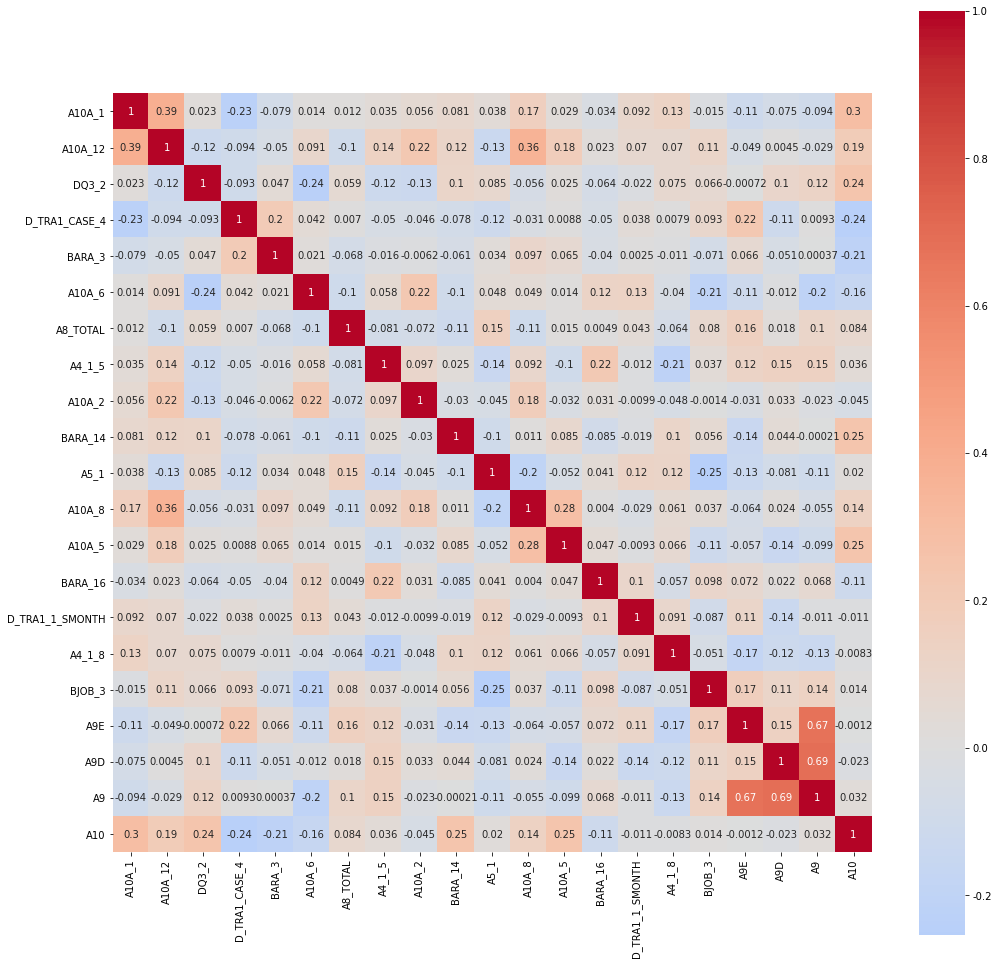

In [183]:
Top20(df_5)

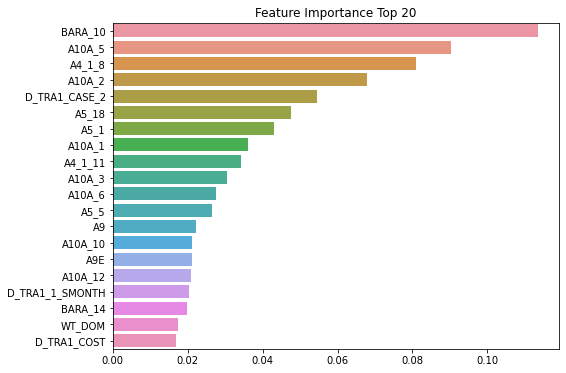

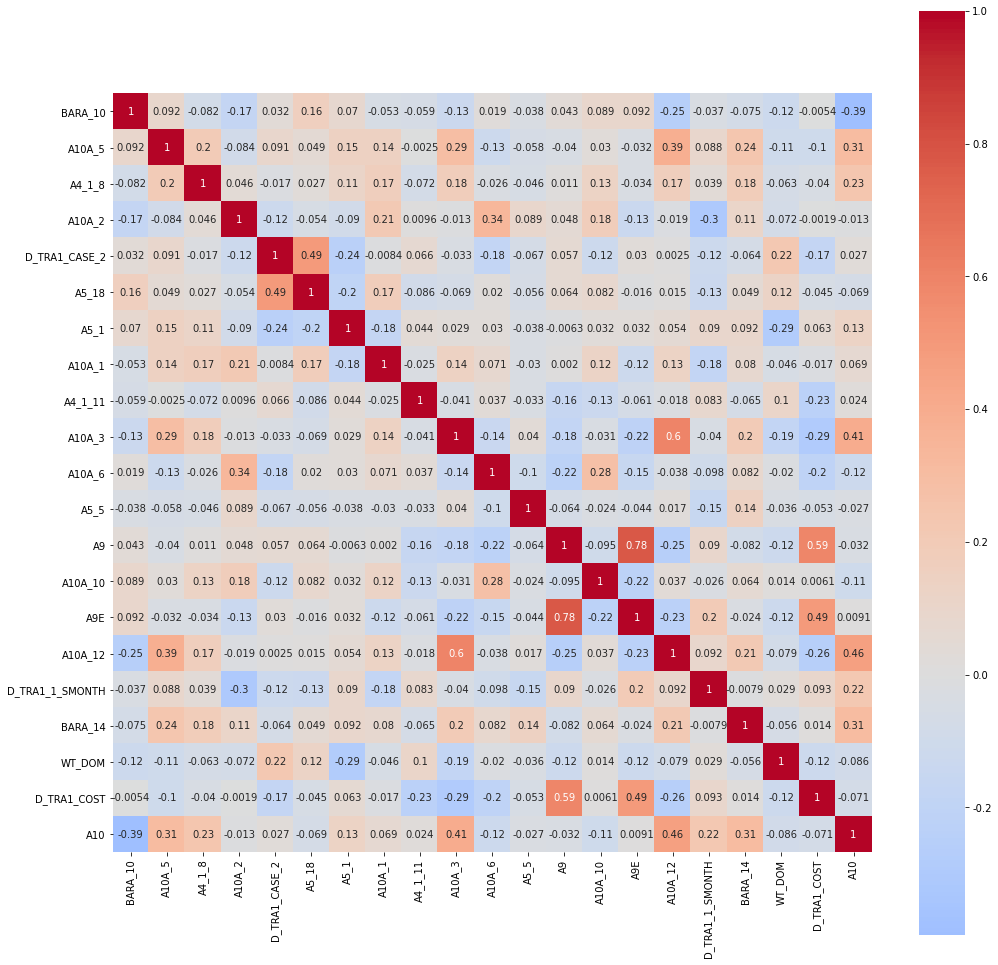

In [184]:
Top20(df_6)

+ 변수선택 뒤로 빼서 selection 하는 과정 필요
+ hue=cluster 로 설정해서 칼럼 나열하는 과정 필요
+ 명목형 변수와 이산형 변수에 대한 처리 각각 필요


In [185]:
df_R = pd.read_csv('/content/drive/My Drive/관광/클러스터최종.csv')

In [ ]:
#change = {0:'A',1:'B',2:'C',3:'D',4:'E',5:'F',6:'G'}
#df_R = df_R.replace({'cluster':change})

In [186]:
df_R

,Unnamed: 0,D_TRA1_CASE,D_TRA1_S_Day,D_TRA1_COST,D_TRA1_1_SMONTH,D_TRA1_1_SPOT,D_TRA1_1_Code,D_TRA1_1_Q6_Ar,D_TRA1_1_Q6,A1_1,A4_1,A5_1,A5_2,A5_3,A5_4,A5_5,A5_6,A5_7,A5_8,A5_9,A5_10,A5_11,A5_12,A5_13,A5_14,A5_15,A5_16,A5_17,A5_18,A5_19,A5_20,A8_TOTAL,A9A,A9A_1,A9A_2,A9B,A9C,A9D,A9E,A9F,...,A10A_3,A10A_4,A10A_5,A10A_6,A10A_7,A10A_8,A10A_9,A10A_10,A10A_11,A10A_12,A11,A12,DQ1,DQ2,DQ3,DQ3A_1,DQ5,DQ6A,DQ6B,BSEX,BAGE,SAGE,BJOB,BINC1,BINC2,BEDU,BFAM,BMON,BARA,WT_DOM,국내_숙박여부,국내_연간여행경험_국내숙박,국내_연간여행경험_국내당일,국내_연간여행경험_관광숙박,국내_연간여행경험_관광당일,국내_월별여행경험_국내숙박,국내_월별여행경험_국내당일,국내_월별여행경험_관광숙박,국내_월별여행경험_관광당일,cluster
0,0,2,0,50000.0,3,23010,23010016,0,,5,8,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,58000,8000,0,...,5,4,5,5,9,9,5,9,3,4,4,4,6,1,1,0,1,4,4,0,3,34,1,3,3,4,1,3,1,16692.085335,0,0,0,0,0,0,1,0,1,D
1,1,1,0,60000.0,5,31130,31130010,0,,1,14,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2000,0,0,0,0,0,43000,35000,0,...,5,4,5,9,5,4,5,9,3,5,4,4,4,1,1,0,1,5,5,1,2,28,1,4,4,3,1,5,1,12054.423169,0,0,0,0,0,0,1,0,1,D
2,2,1,0,30000.0,6,31110,31110007,0,,5,2,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,25000,4000,0,...,5,4,4,9,4,4,4,9,4,4,4,4,4,4,1,0,0,1,7,0,1,19,12,6,1,3,3,6,1,8772.598933,0,0,0,0,0,0,1,0,1,G
3,3,1,0,50000.0,2,31200,31200018,0,,5,11,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,42000,18000,0,...,4,4,3,9,9,4,5,9,2,5,3,3,6,1,1,0,1,5,5,0,2,28,1,4,4,4,1,2,1,16064.859815,0,0,0,0,0,0,1,0,1,D
4,4,1,0,70000.0,2,31370,31370033,0,,1,5,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6000,0,0,0,0,0,15000,40000,0,...,4,4,4,4,4,3,5,9,4,5,4,4,6,1,1,0,1,5,5,1,3,38,1,4,4,4,1,2,1,17997.926178,0,0,0,0,0,0,1,0,1,D
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1432,1432,4,0,100000.0,3,11010,11010900,0,,3,15,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,20000,80000,0,...,4,4,3,9,9,9,9,9,9,9,5,4,5,9,2,0,1,5,12,1,6,61,2,7,4,4,3,3,17,25675.724075,0,0,0,0,0,0,1,0,1,C
1433,1433,1,0,20000.0,2,39020,39020059,0,,1,5,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,15000,5000,0,...,5,4,5,9,5,5,5,5,9,5,5,5,6,3,2,0,1,4,5,1,4,41,1,4,3,4,3,2,17,3058.972772,0,0,0,0,0,0,1,0,1,E
1434,1434,1,0,50000.0,4,39020,39020021,0,,1,5,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,30000,20000,0,...,3,4,4,9,9,9,9,9,9,9,3,3,5,3,2,0,0,1,6,0,5,50,11,5,1,4,3,4,17,7060.099712,0,0,0,0,0,0,1,0,1,A
1435,1435,2,0,10000.0,3,39010,39010900,0,,1,15,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,10000,0,...,3,4,4,9,9,9,9,9,9,9,3,3,5,2,2,1,1,6,6,1,6,64,3,5,5,4,2,3,17,4295.659317,0,0,0,0,0,0,1,0,1,C


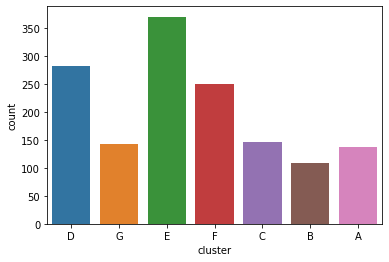

In [187]:
sns.countplot(x="cluster", data=df_R)

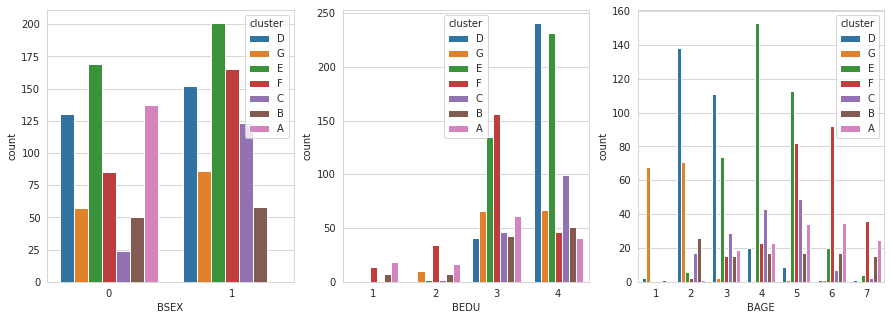

In [188]:
fig = plt.figure(figsize=(15,5))
sns.set_style('whitegrid')

ax1 = fig.add_subplot(1,3,1)
ax2 = fig.add_subplot(1,3,2)
ax3 = fig.add_subplot(1,3,3)

sns.countplot(x="BSEX", hue="cluster", data=df_R, ax=ax1)

sns.countplot(x="BEDU", hue="cluster", data=df_R, ax=ax2)

sns.countplot(x="BAGE", hue="cluster", data=df_R, ax=ax3)
plt.show()


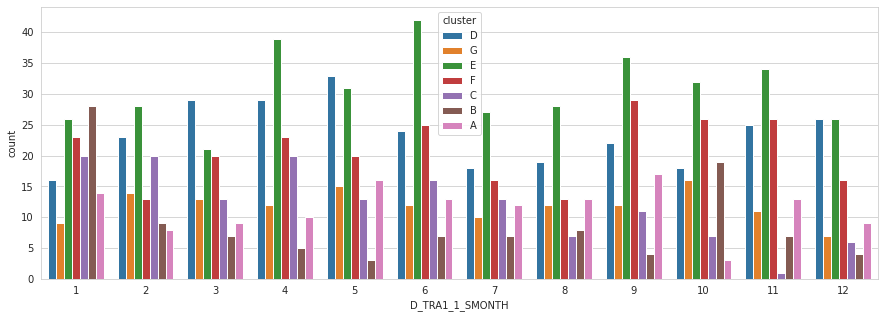

In [189]:
fig = plt.figure(figsize=(15,5))
sns.countplot(x="D_TRA1_1_SMONTH", hue="cluster", data=df_R)
plt.show()

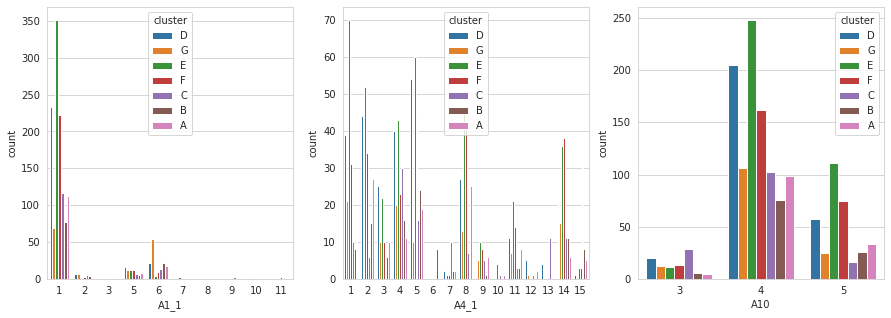

In [190]:
fig = plt.figure(figsize=(15,5))
sns.set_style('whitegrid')

ax1 = fig.add_subplot(1,3,1)
ax2 = fig.add_subplot(1,3,2)
ax3 = fig.add_subplot(1,3,3)

sns.countplot(x="A1_1", hue="cluster", data=df_R, ax=ax1)

sns.countplot(x="A4_1", hue="cluster", data=df_R, ax=ax2)

sns.countplot(x="A10", hue="cluster", data=df_R, ax=ax3)
plt.show()


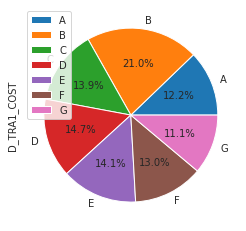

In [191]:
df_R.groupby(['cluster']).mean().plot(kind='pie', y='D_TRA1_COST',autopct='%1.1f%%')
plt.rcParams['figure.figsize'] = (15,15)
plt.rcParams['font.size'] = 50


In [192]:
df_R.columns

Index(['Unnamed: 0', 'D_TRA1_CASE', 'D_TRA1_S_Day', 'D_TRA1_COST',
       'D_TRA1_1_SMONTH', 'D_TRA1_1_SPOT', 'D_TRA1_1_Code', 'D_TRA1_1_Q6_Ar',
       'D_TRA1_1_Q6', 'A1_1', 'A4_1', 'A5_1', 'A5_2', 'A5_3', 'A5_4', 'A5_5',
       'A5_6', 'A5_7', 'A5_8', 'A5_9', 'A5_10', 'A5_11', 'A5_12', 'A5_13',
       'A5_14', 'A5_15', 'A5_16', 'A5_17', 'A5_18', 'A5_19', 'A5_20',
       'A8_TOTAL', 'A9A', 'A9A_1', 'A9A_2', 'A9B', 'A9C', 'A9D', 'A9E', 'A9F',
       'A9F_5', 'A9G', 'A9I', 'PA9I', 'NA9I', 'A9I_1', 'NA9I_1', 'A9', 'A90D',
       'A90F', 'A90G', 'A90I', 'A10', 'A10A_1', 'A10A_2', 'A10A_3', 'A10A_4',
       'A10A_5', 'A10A_6', 'A10A_7', 'A10A_8', 'A10A_9', 'A10A_10', 'A10A_11',
       'A10A_12', 'A11', 'A12', 'DQ1', 'DQ2', 'DQ3', 'DQ3A_1', 'DQ5', 'DQ6A',
       'DQ6B', 'BSEX', 'BAGE', 'SAGE', 'BJOB', 'BINC1', 'BINC2', 'BEDU',
       'BFAM', 'BMON', 'BARA', 'WT_DOM', '국내_숙박여부', '국내_연간여행경험_국내숙박',
       '국내_연간여행경험_국내당일', '국내_연간여행경험_관광숙박', '국내_연간여행경험_관광당일', '국내_월별여행경험_국내숙박',
       '국내_월별여행경험

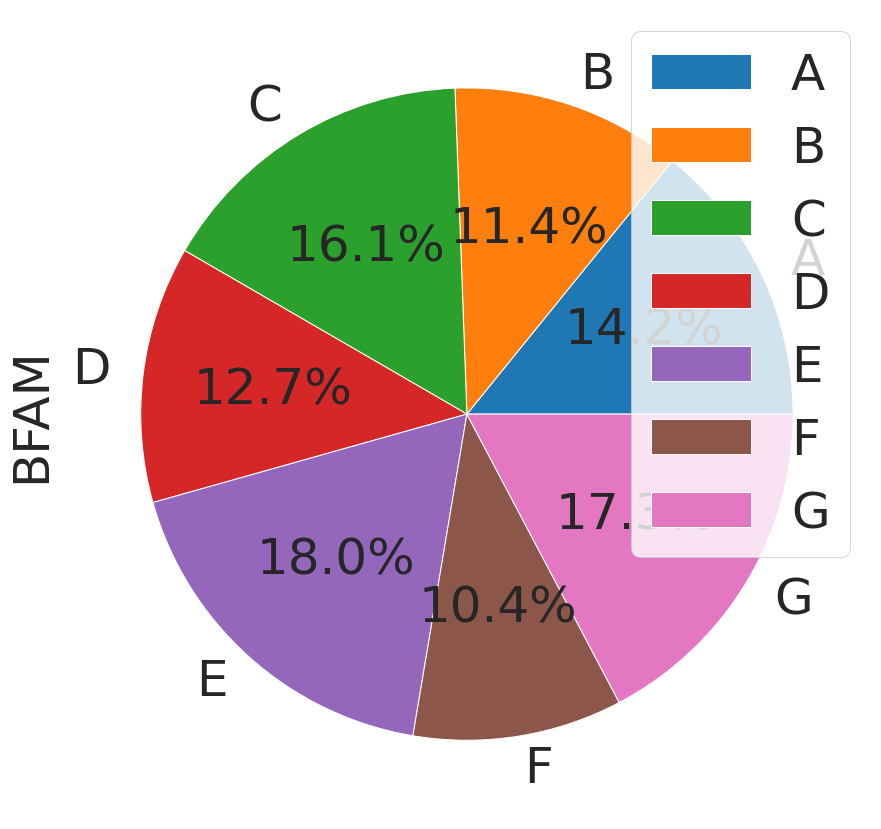

In [193]:
df_R.groupby(['cluster']).mean().plot(kind='pie', y='BFAM',autopct='%1.1f%%')
plt.rcParams['figure.figsize'] = (15,15)
plt.rcParams['font.size'] = 50


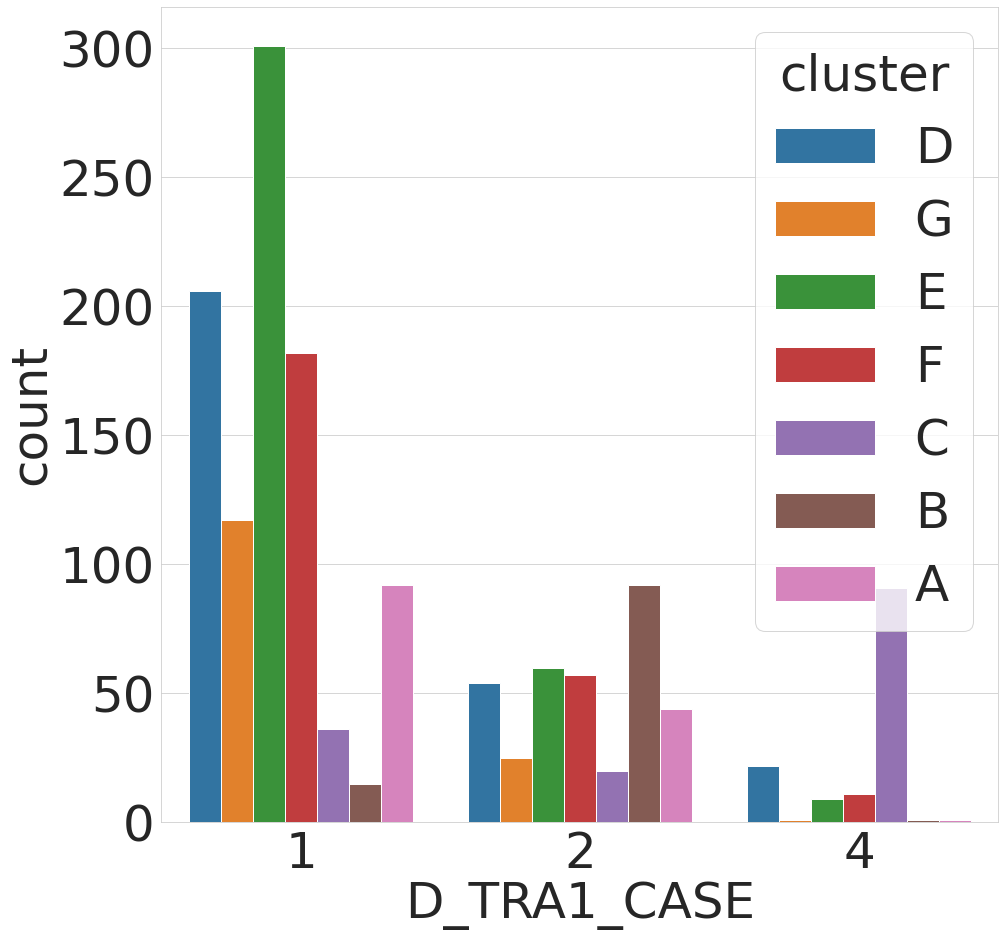

In [196]:
#fig = plt.figure(figsize=(15,5))
sns.countplot(x="D_TRA1_CASE", hue="cluster", data=df_R)
plt.show()

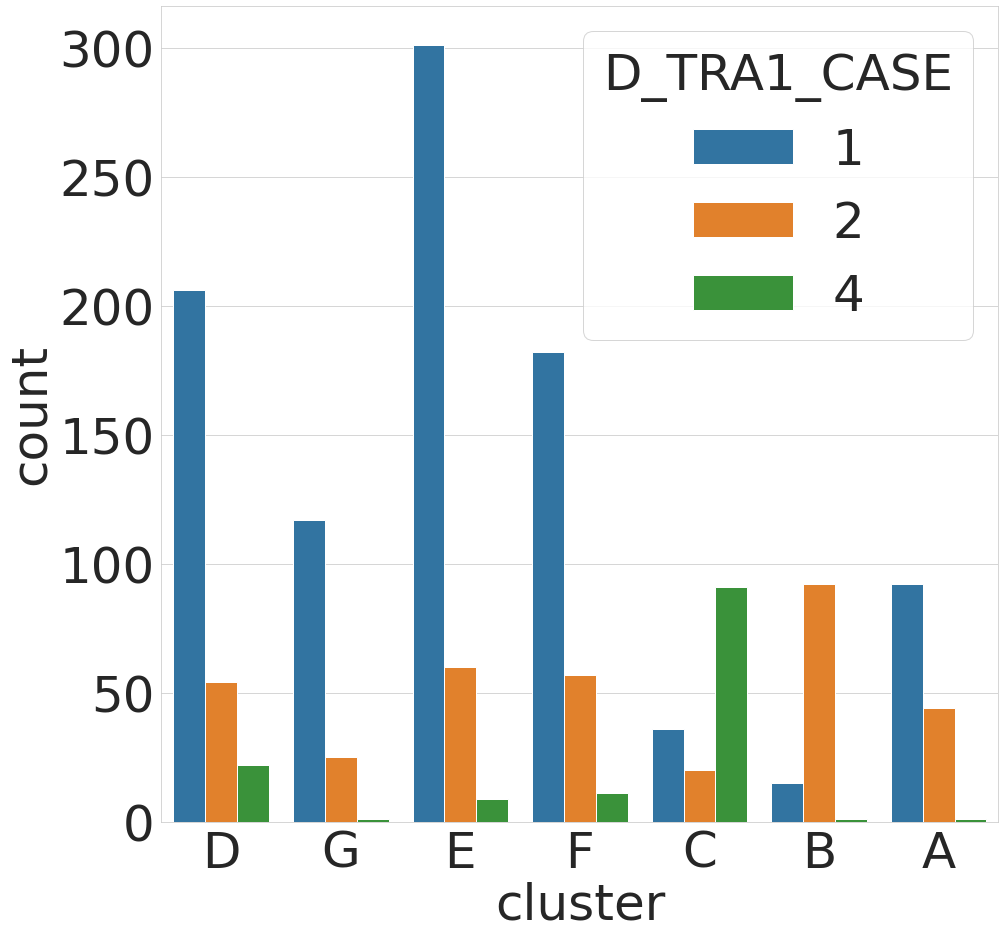

In [197]:
#fig = plt.figure(figsize=(15,5))
sns.countplot(x="cluster", hue="D_TRA1_CASE", data=df_R)
plt.show()